## 1. Importation et préparation des données

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [2]:
application_test = pd.read_csv('application_test.csv', sep=',', encoding='ISO-8859-1')
application_train = pd.read_csv('application_train.csv', sep=',', encoding='ISO-8859-1')
bureau_balance = pd.read_csv('bureau_balance.csv', sep=',', encoding='ISO-8859-1')
bureau = pd.read_csv('bureau.csv', sep=',', encoding='ISO-8859-1')
credit_card_balance = pd.read_csv('credit_card_balance.csv', sep=',', encoding='ISO-8859-1')
HomeCredit_columns_description = pd.read_csv('HomeCredit_columns_description.csv', sep=',', encoding='ISO-8859-1')
installments_payments = pd.read_csv('installments_payments.csv', sep=',', encoding='ISO-8859-1')
POS_CASH_balance = pd.read_csv('POS_CASH_balance.csv', sep=',', encoding='ISO-8859-1')
previous_application = pd.read_csv('previous_application.csv', sep=',', encoding='ISO-8859-1')
sample_submission = pd.read_csv('sample_submission.csv', sep=',', encoding='ISO-8859-1')

In [4]:
print("application_test -  rows:",application_test.shape[0]," columns:", application_test.shape[1])
print("application_train -  rows:",application_train.shape[0]," columns:", application_train.shape[1])
print("bureau_balance -  rows:",bureau_balance.shape[0]," columns:", bureau_balance.shape[1])
print("bureau -  rows:",bureau.shape[0]," columns:", bureau.shape[1])
print("credit_card_balance -  rows:",credit_card_balance.shape[0]," columns:", credit_card_balance.shape[1])
print("HomeCredit_columns_description-  rows:",HomeCredit_columns_description.shape[0]," columns:", HomeCredit_columns_description.shape[1])
print("installments_payments -  rows:",installments_payments.shape[0]," columns:", installments_payments.shape[1])
print("POS_CASH_balance -  rows:",POS_CASH_balance.shape[0]," columns:", POS_CASH_balance.shape[1])
print("previous_application -  rows:",previous_application.shape[0]," columns:", previous_application.shape[1])
print("sample_submission -  rows:",sample_submission.shape[0]," columns:", sample_submission.shape[1])

application_test -  rows: 48744  columns: 121
application_train -  rows: 307511  columns: 122
bureau_balance -  rows: 27299925  columns: 3
bureau -  rows: 1716428  columns: 17
credit_card_balance -  rows: 3840312  columns: 23
HomeCredit_columns_description-  rows: 219  columns: 5
installments_payments -  rows: 13605401  columns: 8
POS_CASH_balance -  rows: 10001358  columns: 8
previous_application -  rows: 1670214  columns: 37
sample_submission -  rows: 48744  columns: 2


In [5]:
# Fonction pour afficher les colonnes et les premières valeurs d'un DataFrame
def display_columns(df, df_name):
    display(f"--- {df_name} ---")
    display(list(df.columns))  

pd.set_option('display.max_rows', None)
# Appeler la fonction pour chaque DataFrame
display_columns(application_test, "application_test")
display_columns(application_train, "application_train")
display_columns(bureau_balance, "bureau_balance")
display_columns(bureau, "bureau")
display_columns(credit_card_balance, "credit_card_balance")
display_columns(HomeCredit_columns_description, "HomeCredit_columns_description")
display_columns(installments_payments, "installments_payments")
display_columns(POS_CASH_balance, "POS_CASH_balance")
display_columns(previous_application, "previous_application")
display_columns(sample_submission, "sample_submission")

'--- application_test ---'

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEAR

'--- application_train ---'

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

'--- bureau_balance ---'

['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS']

'--- bureau ---'

['SK_ID_CURR',
 'SK_ID_BUREAU',
 'CREDIT_ACTIVE',
 'CREDIT_CURRENCY',
 'DAYS_CREDIT',
 'CREDIT_DAY_OVERDUE',
 'DAYS_CREDIT_ENDDATE',
 'DAYS_ENDDATE_FACT',
 'AMT_CREDIT_MAX_OVERDUE',
 'CNT_CREDIT_PROLONG',
 'AMT_CREDIT_SUM',
 'AMT_CREDIT_SUM_DEBT',
 'AMT_CREDIT_SUM_LIMIT',
 'AMT_CREDIT_SUM_OVERDUE',
 'CREDIT_TYPE',
 'DAYS_CREDIT_UPDATE',
 'AMT_ANNUITY']

'--- credit_card_balance ---'

['SK_ID_PREV',
 'SK_ID_CURR',
 'MONTHS_BALANCE',
 'AMT_BALANCE',
 'AMT_CREDIT_LIMIT_ACTUAL',
 'AMT_DRAWINGS_ATM_CURRENT',
 'AMT_DRAWINGS_CURRENT',
 'AMT_DRAWINGS_OTHER_CURRENT',
 'AMT_DRAWINGS_POS_CURRENT',
 'AMT_INST_MIN_REGULARITY',
 'AMT_PAYMENT_CURRENT',
 'AMT_PAYMENT_TOTAL_CURRENT',
 'AMT_RECEIVABLE_PRINCIPAL',
 'AMT_RECIVABLE',
 'AMT_TOTAL_RECEIVABLE',
 'CNT_DRAWINGS_ATM_CURRENT',
 'CNT_DRAWINGS_CURRENT',
 'CNT_DRAWINGS_OTHER_CURRENT',
 'CNT_DRAWINGS_POS_CURRENT',
 'CNT_INSTALMENT_MATURE_CUM',
 'NAME_CONTRACT_STATUS',
 'SK_DPD',
 'SK_DPD_DEF']

'--- HomeCredit_columns_description ---'

['Unnamed: 0', 'Table', 'Row', 'Description', 'Special']

'--- installments_payments ---'

['SK_ID_PREV',
 'SK_ID_CURR',
 'NUM_INSTALMENT_VERSION',
 'NUM_INSTALMENT_NUMBER',
 'DAYS_INSTALMENT',
 'DAYS_ENTRY_PAYMENT',
 'AMT_INSTALMENT',
 'AMT_PAYMENT']

'--- POS_CASH_balance ---'

['SK_ID_PREV',
 'SK_ID_CURR',
 'MONTHS_BALANCE',
 'CNT_INSTALMENT',
 'CNT_INSTALMENT_FUTURE',
 'NAME_CONTRACT_STATUS',
 'SK_DPD',
 'SK_DPD_DEF']

'--- previous_application ---'

['SK_ID_PREV',
 'SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'NAME_SELLER_INDUSTRY',
 'CNT_PAYMENT',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

'--- sample_submission ---'

['SK_ID_CURR', 'TARGET']

In [3]:
application_test['Type_data'] = 'test'
application_train['Type_data'] = 'train'

In [4]:
# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category=True):
    original_columns = list(df.columns)
    # Exclure la colonne 'Type_data' des colonnes catégorielles
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object' and col != 'Type_data']
    # Encodage one-hot pour les autres colonnes catégorielles
    df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

def application_train_test(num_rows=None, nan_as_category=False):
    # Read data and merge
    df = application_train.copy()
    test_df = application_test.copy()

    # Ensure 'TARGET' column exists in test data by filling it with NaN
    test_df['TARGET'] = np.nan

    # Combine train and test datasets
    print("Train samples: {}, test samples: {}".format(len(df), len(test_df)))
    df = pd.concat([df, test_df], axis=0).reset_index(drop=True)

    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])

    # Categorical features with One-Hot encode (excluding 'Type_data')
    df, cat_cols = one_hot_encoder(df, nan_as_category)

    # Assurer que 'Type_data' est bien une colonne catégorielle
    df['Type_data'] = df['Type_data'].astype('category')

    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)

    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

    # Clean up
    del test_df
    gc.collect()

    return df


# Preprocess bureau.csv and bureau_balance.csv
def bureau_and_balance(num_rows = None, nan_as_category = True):
    bureau = pd.read_csv('bureau.csv', sep=',', encoding='ISO-8859-1')
    bb = pd.read_csv('bureau_balance.csv', sep=',', encoding='ISO-8859-1')
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)
    
    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()
    
    # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
    
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()
    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    return bureau_agg

# Preprocess previous_applications.csv
def previous_applications(num_rows = None, nan_as_category = True):
    prev = pd.read_csv('previous_application.csv', sep=',', encoding='ISO-8859-1')
    prev, cat_cols = one_hot_encoder(prev, nan_as_category= True)
    # Days 365.243 values -> nan
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    # Add feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    # Previous applications categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']
    
    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')
    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()
    return prev_agg

# Preprocess POS_CASH_balance.csv
def pos_cash(num_rows = None, nan_as_category = True):
    pos= pd.read_csv('POS_CASH_balance.csv', sep=',', encoding='ISO-8859-1')
    pos, cat_cols = one_hot_encoder(pos, nan_as_category= True)
    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    
    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    del pos
    gc.collect()
    return pos_agg
    
# Preprocess installments_payments.csv
def installments_payments(num_rows = None, nan_as_category = True):
    ins = pd.read_csv('installments_payments.csv', sep=',', encoding='ISO-8859-1')
    ins, cat_cols = one_hot_encoder(ins, nan_as_category= True)
    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    # Days past due and days before due (no negative values)
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    del ins
    gc.collect()
    return ins_agg

# Preprocess credit_card_balance.csv
def credit_card_balance(num_rows = None, nan_as_category = True):
    cc= pd.read_csv('credit_card_balance.csv', sep=',', encoding='ISO-8859-1')
    cc, cat_cols = one_hot_encoder(cc, nan_as_category= True)
    # General aggregations
    cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
    del cc
    gc.collect()
    return cc_agg


In [5]:
# Appeler les fonctions de prétraitement
train_test_df = application_train_test()           # application_train.csv et application_test.csv
bureau_agg_df = bureau_and_balance()               # bureau.csv et bureau_balance.csv
prev_app_agg_df = previous_applications()          # previous_application.csv
pos_cash_agg_df = pos_cash()                       # POS_CASH_balance.csv
installments_agg_df = installments_payments()      # installments_payments.csv
credit_card_agg_df = credit_card_balance()         # credit_card_balance.csv

# Fusionner les différents jeux de données avec 'train_test_df'
# Le DataFrame principal est `train_test_df`, et nous fusionnons chaque ensemble basé sur `SK_ID_CURR`.
train_test_df = train_test_df.merge(bureau_agg_df, on='SK_ID_CURR', how='left')
train_test_df = train_test_df.merge(prev_app_agg_df, on='SK_ID_CURR', how='left')
train_test_df = train_test_df.merge(pos_cash_agg_df, on='SK_ID_CURR', how='left')
train_test_df = train_test_df.merge(installments_agg_df, on='SK_ID_CURR', how='left')
train_test_df = train_test_df.merge(credit_card_agg_df, on='SK_ID_CURR', how='left')

Train samples: 307511, test samples: 48744


In [6]:
train_test_df

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0.0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,100007,0.0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,456221,NaN,1,0,0,0,121500.0,412560.0,17473.5,270000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356251,456222,NaN,1,0,1,2,157500.0,622413.0,31909.5,495000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356252,456223,NaN,1,1,0,1,202500.0,315000.0,33205.5,315000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356253,456224,NaN,0,0,1,0,225000.0,450000.0,25128.0,450000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Vérifier si SK_ID_CURR contient uniquement des valeurs uniques
unique_values = train_test_df['SK_ID_CURR'].nunique()

# Comparer avec le nombre total de lignes
total_values = len(train_test_df['SK_ID_CURR'])

if unique_values == total_values:
    print("Toutes les valeurs de SK_ID_CURR sont uniques.")
else:
    print(f"Il y a {total_values - unique_values} doublons dans SK_ID_CURR.")

Toutes les valeurs de SK_ID_CURR sont uniques.


In [8]:
# Vérifier si 'Type_data' est une colonne dans le DataFrame
if 'Type_data' in train_test_df.columns:
    print("'Type_data' est une variable dans train_test_df.")
else:
    print("'Type_data' n'est pas une variable dans train_test_df.")

'Type_data' est une variable dans train_test_df.


## 2. Exploratory data analysis

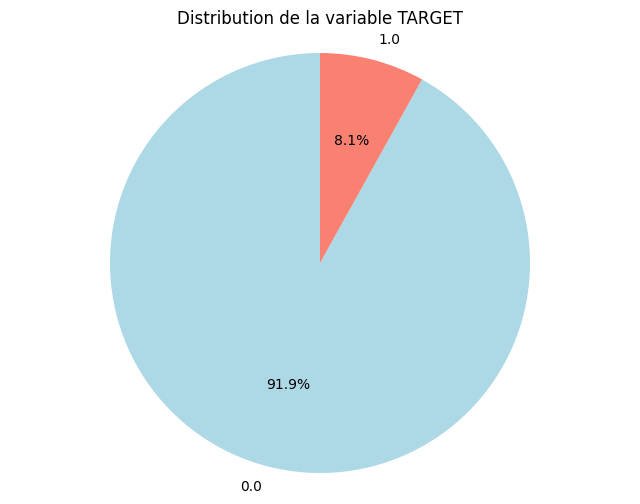

In [9]:
# Calculer la distribution de la variable TARGET
target_distribution = train_test_df['TARGET'].value_counts()

# Créer le camembert
plt.figure(figsize=(8, 6))
plt.pie(target_distribution, labels=target_distribution.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Distribution de la variable TARGET')
plt.axis('equal')  # Pour s'assurer que le camembert est un cercle
plt.show()

Ces données indiquent un problème de déséquilibre pour la variable Target, avec un nombre nettement supérieur de prêts remboursés à temps (91.9%) par rapport aux prêts non remboursés (8.1%). Pour corriger ce déséquilibre lors de l'utilisation de modèles d'apprentissage automatique plus avancés, nous pourrons ajuster la pondération des classes en fonction de leur fréquence dans les données.

### Corrélations

In [22]:
# Calculer les corrélations avec la variable TARGET
corr_with_target = train_test_df.corr()['TARGET'].sort_values(ascending=False)

# Filtrer les variables ayant une corrélation significative avec TARGET
threshold = 0.05  # définir le seuil
significant_vars = corr_with_target[abs(corr_with_target) > threshold].index.tolist()

# Créer un sous-ensemble du DataFrame avec ces variables
df_significant = train_test_df[significant_vars]

# Calculer la matrice de corrélation pour ces variables
corr_matrix = df_significant.corr().abs()

# Supprimer les variables corrélées entre elles (Multicolinéarité)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Trouver les variables ayant une corrélation supérieure au seuil (par exemple 0.8)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

# Supprimer les variables corrélées entre elles
df_reduced = df_significant.drop(columns=to_drop)

# Créer un DataFrame sans valeurs manquantes pour le calcul du VIF
X = df_reduced.dropna().assign(constant=1)

# Calculer les VIF pour chaque variable sur les données sans valeurs manquantes
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Filtrer les variables ayant un VIF élevé (par exemple > 5)
final_vars = vif_data[vif_data['VIF'] < 5]['feature'].tolist()

# Supprimer la constante du résultat final si présente
if 'constant' in final_vars:
    final_vars.remove('constant')

# Les variables finales sélectionnées
print("Variables sélectionnées :", final_vars)

/var/folders/xy/0lf4cqg97cq6qg1y7t6fp0sw0000gn/T/ipykernel_11427/153647747.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_target = train_test_df.corr()['TARGET'].sort_values(ascending=False)


Variables sélectionnées : ['TARGET', 'CC_CNT_DRAWINGS_ATM_CURRENT_MEAN', 'CC_AMT_BALANCE_MEAN', 'DAYS_BIRTH', 'PREV_NAME_CONTRACT_STATUS_Refused_MEAN', 'BURO_CREDIT_ACTIVE_Active_MEAN', 'BURO_DAYS_CREDIT_MIN', 'DAYS_EMPLOYED', 'BURO_DAYS_CREDIT_UPDATE_MEAN', 'REFUSED_DAYS_DECISION_MAX', 'CC_AMT_BALANCE_MIN', 'ACTIVE_DAYS_CREDIT_MEAN', 'CC_CNT_DRAWINGS_ATM_CURRENT_MAX', 'CC_CNT_DRAWINGS_CURRENT_VAR', 'CC_MONTHS_BALANCE_MEAN', 'BURO_STATUS_1_MEAN_MEAN', 'CC_CNT_DRAWINGS_ATM_CURRENT_VAR', 'REGION_RATING_CLIENT_W_CITY', 'CC_AMT_DRAWINGS_ATM_CURRENT_MEAN', 'CC_AMT_DRAWINGS_CURRENT_MEAN', 'NAME_INCOME_TYPE_Working', 'PREV_NAME_PRODUCT_TYPE_walk-in_MEAN', 'PREV_CODE_REJECT_REASON_SCOFR_MEAN', 'DAYS_LAST_PHONE_CHANGE', 'PREV_CODE_REJECT_REASON_HC_MEAN', 'APPROVED_DAYS_DECISION_MIN', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 'CC_CNT_DRAWINGS_CURRENT_SUM', 'REFUSED_HOUR_APPR_PROCESS_START_MIN', 'CODE_GENDER', 'BURO_STATUS_C_MEAN_MEAN', 'NAME_EDUCATION_TYPE_Higher education', 'CLOSED_MONTHS_BA

/var/folders/xy/0lf4cqg97cq6qg1y7t6fp0sw0000gn/T/ipykernel_11427/4250986207.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_2 = train_test_df_2.corr()


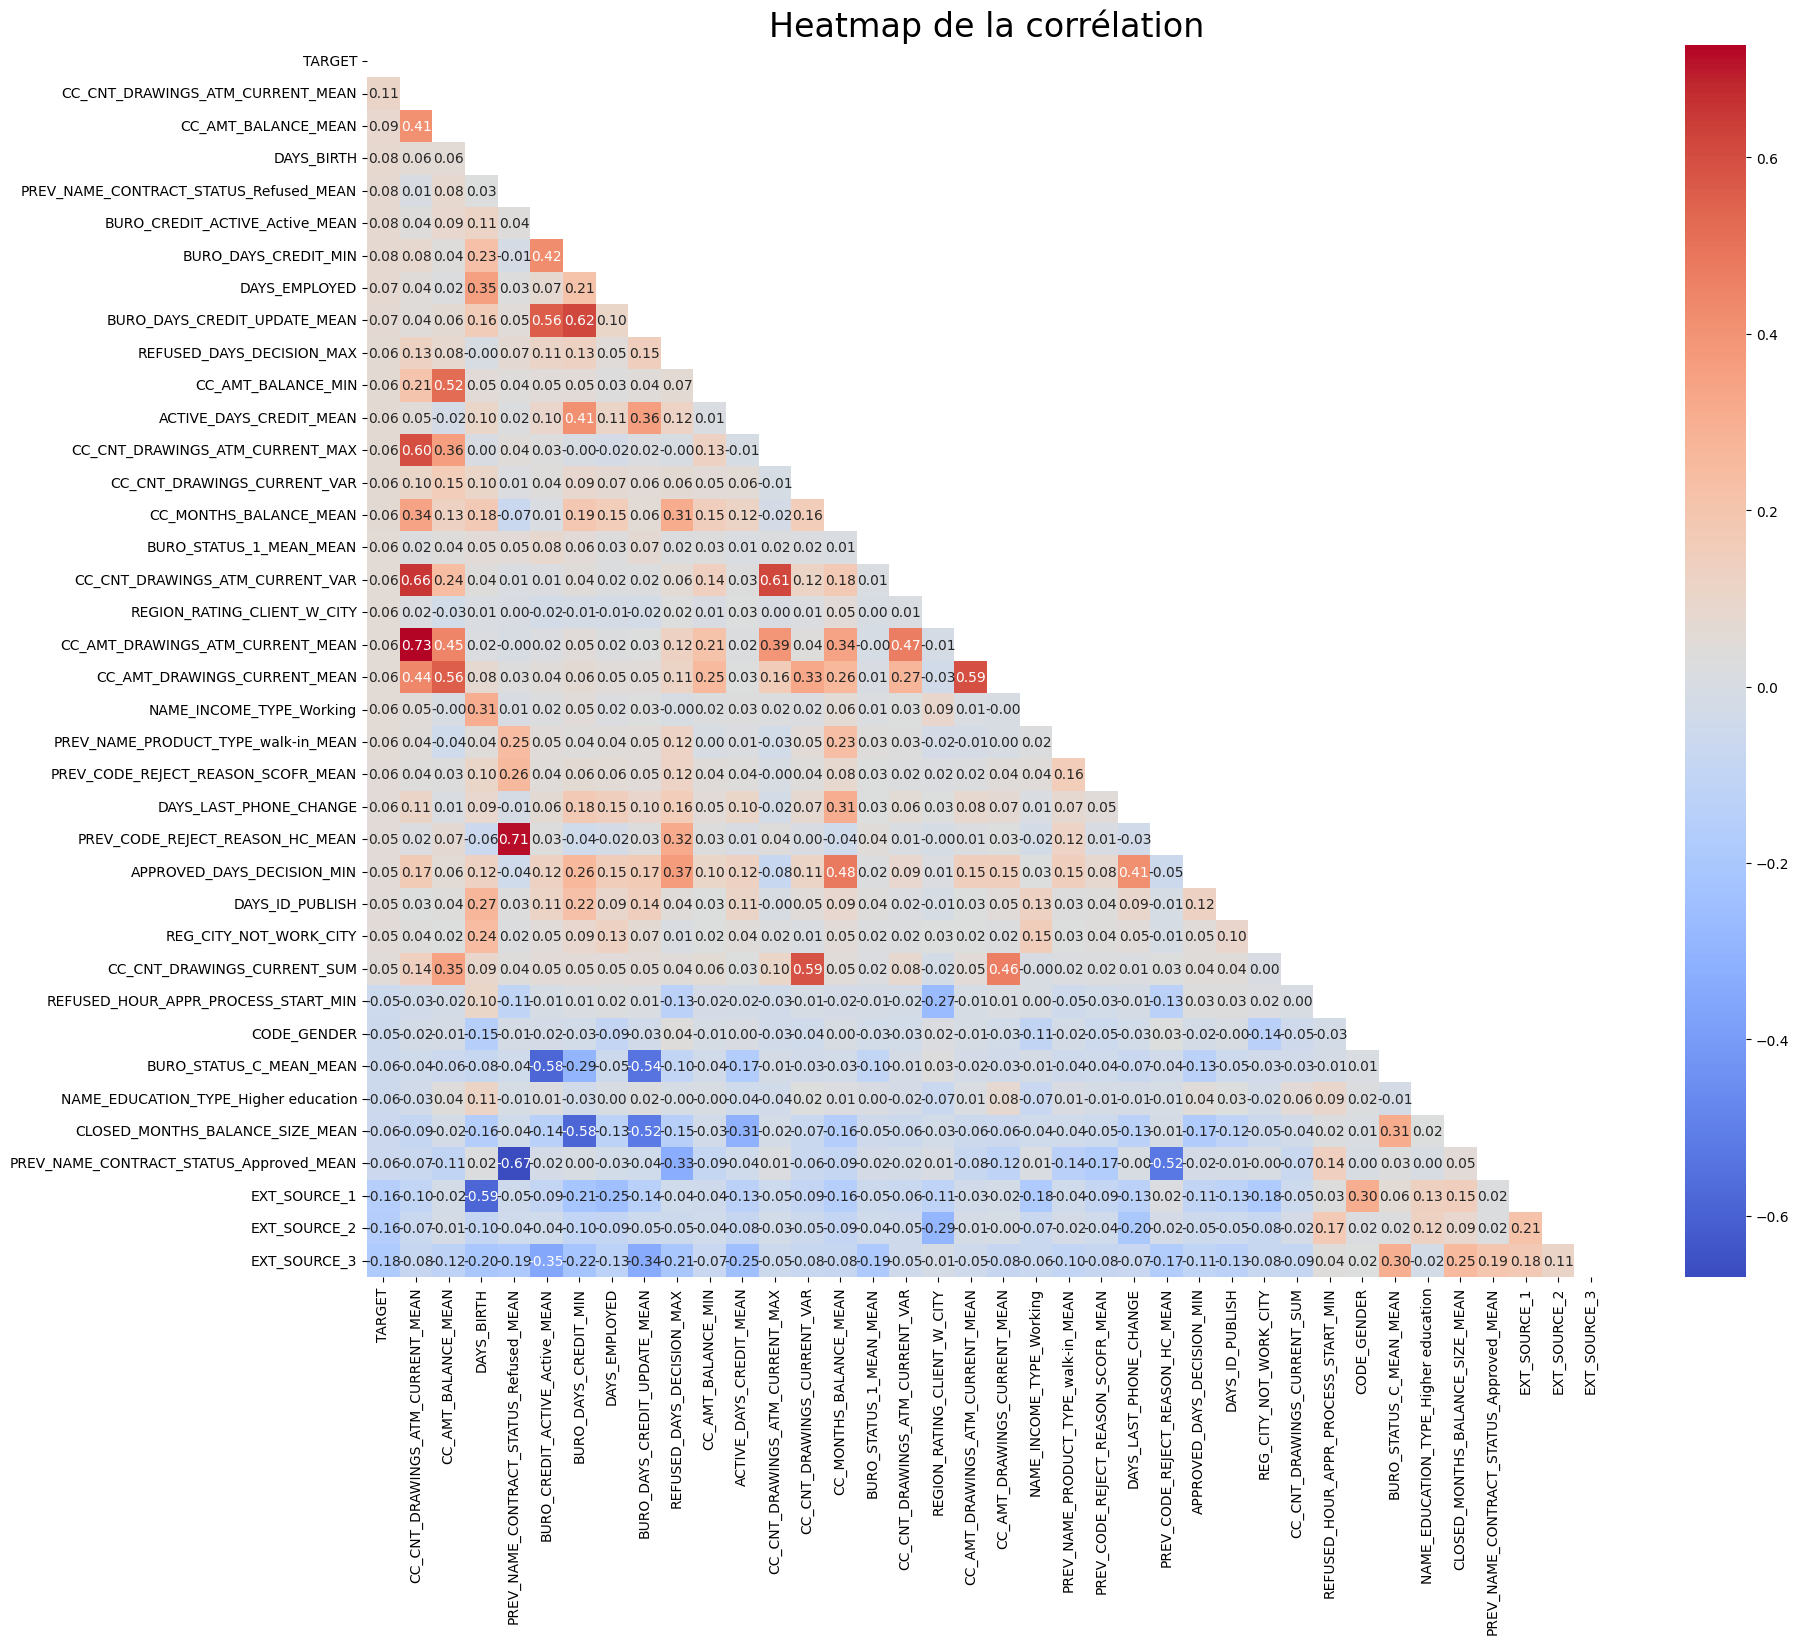

In [23]:
# Créer le nouveau DataFrame avec les variables sélectionnées et la variable 'Type_data'
final_vars_with_type_data = final_vars + ['Type_data']
train_test_df_2 = train_test_df[final_vars_with_type_data]

# Calculer la matrice de corrélation pour les variables sélectionnées
corr_matrix_2 = train_test_df_2.corr()

# Masquer la moitié inférieure de la matrice de corrélation
mask = np.triu(np.ones_like(corr_matrix_2, dtype=bool))

# Tracer la heatmap avec le masque
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix_2, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Heatmap de la corrélation", fontsize=24)
plt.show()

In [24]:
train_test_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 356254
Data columns (total 39 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   TARGET                                   307511 non-null  float64 
 1   CC_CNT_DRAWINGS_ATM_CURRENT_MEAN         72194 non-null   float64 
 2   CC_AMT_BALANCE_MEAN                      103558 non-null  float64 
 3   DAYS_BIRTH                               356255 non-null  int64   
 4   PREV_NAME_CONTRACT_STATUS_Refused_MEAN   338857 non-null  float64 
 5   BURO_CREDIT_ACTIVE_Active_MEAN           305811 non-null  float64 
 6   BURO_DAYS_CREDIT_MIN                     305811 non-null  float64 
 7   DAYS_EMPLOYED                            291607 non-null  float64 
 8   BURO_DAYS_CREDIT_UPDATE_MEAN             305811 non-null  float64 
 9   REFUSED_DAYS_DECISION_MAX                118277 non-null  float64 
 10  CC_AMT_BALANCE_MIN  

#### Valeurs manquantes

In [14]:
# Calculer le nombre de valeurs manquantes pour chaque colonne
missing_values = train_test_df_2.isnull().sum()

# Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_percentage = 100 * missing_values / len(train_test_df)

# Créer un DataFrame avec le nombre et le pourcentage de valeurs manquantes
missing_df = pd.DataFrame({'Missing Values': missing_values, '% of Total Values': missing_percentage})

# Trier les colonnes par pourcentage de valeurs manquantes en ordre décroissant
missing_df_sorted = missing_df[missing_df['Missing Values'] > 0].sort_values('% of Total Values', ascending=False).round(2)

# Afficher le résultat
missing_df_sorted


,Missing Values,% of Total Values
REFUSED_RATE_DOWN_PAYMENT_MAX,303650,85.23
REFUSED_RATE_DOWN_PAYMENT_MIN,303650,85.23
REFUSED_RATE_DOWN_PAYMENT_MEAN,303650,85.23
REFUSED_AMT_DOWN_PAYMENT_MIN,303650,85.23
REFUSED_AMT_DOWN_PAYMENT_MAX,303650,85.23
...,...,...
PAYMENT_RATE,36,0.01
AMT_ANNUITY,36,0.01
INCOME_PER_PERSON,2,0.00
CNT_FAM_MEMBERS,2,0.00


Avant de passer à la phase d’entraînement des modèles, il sera crucial de traiter les colonnes avec des valeurs manquantes afin de garantir la qualité des données et d'améliorer les performances du modèle.

### Valeurs nulles

In [ ]:
# Calculer le pourcentage de valeurs nulles par variable
pourcentage_valeurs_nulles = train_test_df.isnull().mean() * 100

# Trier par ordre décroissant
pourcentage_valeurs_nulles_tries = pourcentage_valeurs_nulles.sort_values(ascending=False)

# Afficher le résultat
pourcentage_valeurs_nulles_tries

In [36]:
pip install --upgrade scikit-learn imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 27.4 MB/s eta 0:00:0000:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.1
    Uninstalling scikit-learn-1.5.1:
      Successfully uninstalled scikit-learn-1.5.1
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.11.0
    Uninstalling imbalanced-learn-0.11.0:
      Successfully uninstalled imbalanced-learn-0.11.0
Note: you may need to restart the kernel to use updated packages.


In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline

In [38]:
# 1. Préparation des données
train_data = train_test_df_2[train_test_df_2['Type_data'] == 'train']
test_data = train_test_df_2[train_test_df_2['Type_data'] == 'test']

X_train = train_data.drop(['TARGET', 'Type_data'], axis=1)
y_train = train_data['TARGET']
X_test = test_data.drop(['TARGET', 'Type_data'], axis=1)
y_test = test_data['TARGET']

In [39]:
# 2. Fonction de calcul du coût métier
def business_cost(y_true, y_pred_proba, threshold=0.5, fn_cost=10, fp_cost=1):
    y_pred = (y_pred_proba >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = fn_cost * fn + fp_cost * fp
    return cost

In [40]:
# Fonction d'optimisation du seuil pour minimiser le coût métier
def optimize_threshold(y_true, y_pred_proba):
    thresholds = np.arange(0.1, 1.0, 0.01)
    best_threshold = 0.5
    min_cost = np.inf
    for threshold in thresholds:
        cost = business_cost(y_true, y_pred_proba, threshold=threshold)
        if cost < min_cost:
            min_cost = cost
            best_threshold = threshold
    return best_threshold

In [41]:
def test_model_with_smote_gridsearch(model, param_grid, X_train, y_train, X_test, y_test, model_name):
    """
    Fonction qui teste un modèle avec GridSearch, utilise SMOTE pour traiter le déséquilibre des classes,
    et optimise le seuil pour le coût métier.
    
    Paramètres:
    - model: le modèle ML à tester
    - param_grid: grille d'hyperparamètres pour GridSearchCV
    - X_train, y_train: données d'entraînement
    - X_test, y_test: données de test
    - model_name: nom du modèle pour identification
    
    Retourne:
    - Dictionnaire avec AUC, accuracy, coût métier, et seuil optimisé
    """
    # Pipeline avec SMOTE et le modèle
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    pipeline = Pipeline(steps=[('smote', smote), ('model', model)])
    
    # GridSearchCV pour optimiser les hyperparamètres
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='roc_auc', cv=5)
    grid_search.fit(X_train, y_train)
    
    # Meilleur modèle trouvé par GridSearch
    best_model = grid_search.best_estimator_
    
    # Prédire les probabilités sur les données de test
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    
    # Calcul du score AUC
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    # Prédiction avec un seuil de 0.5 pour calculer l'accuracy
    y_pred = (y_pred_proba >= 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Optimiser le seuil pour minimiser le coût métier
    best_threshold = optimize_threshold(y_test, y_pred_proba)
    cost = business_cost(y_test, y_pred_proba, threshold=best_threshold)
    
    # Affichage des résultats pour le modèle
    print(f"Modèle: {model_name}")
    print(f"Meilleurs paramètres: {grid_search.best_params_}")
    print(f"AUC: {auc_score}")
    print(f"Accuracy: {accuracy}")
    print(f"Coût métier: {cost} (Seuil optimisé: {best_threshold})\n")
    
    return {
        'Model': model_name,
        'AUC': auc_score,
        'Accuracy': accuracy,
        'Cost': cost,
        'Best Threshold': best_threshold,
        'Best Params': grid_search.best_params_
    }


In [33]:
# 4. Définition des modèles et des grilles d'hyperparamètres

# 4.1. Random Forest
rf_model = RandomForestClassifier()
param_grid_rf = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [5, 10],
    'model__min_samples_split': [2, 5]
}

# 4.2. XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
param_grid_xgb = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 6],
    'model__learning_rate': [0.01, 0.1]
}

# 4.3. Régression Logistique
logistic_model = LogisticRegression(solver='liblinear')
param_grid_logistic = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l1', 'l2']
}

# 4.4. LightGBM
lgb_model = lgb.LGBMClassifier()
param_grid_lgb = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [5, 10],
    'model__learning_rate': [0.01, 0.1],
    'model__num_leaves': [31, 50]
    }

In [43]:
# 5. Test des différents modèles avec SMOTE et stockage dans un DataFrame
results = []

results.append(test_model_with_smote_gridsearch(rf_model, param_grid_rf, X_train, y_train, X_test, y_test, "Random Forest"))
results.append(test_model_with_smote_gridsearch(xgb_model, param_grid_xgb, X_train, y_train, X_test, y_test, "XGBoost"))
results.append(test_model_with_smote_gridsearch(logistic_model, param_grid_logistic, X_train, y_train, X_test, y_test, "Régression Logistique"))
results.append(test_model_with_smote_gridsearch(lgb_model, param_grid_lgb, X_train, y_train, X_test, y_test, "LightGBM"))

# Convertir les résultats en DataFrame
results_df = pd.DataFrame(results)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/xy/0lf4cqg97cq6qg1y7t6fp0sw0000gn/T/ipykernel_11427/418915249.py", line 4, in <module>
    results.append(test_model_with_smote_gridsearch(rf_model, param_grid_rf, X_train, y_train, X_test, y_test, "Random Forest"))
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/xy/0lf4cqg97cq6qg1y7t6fp0sw0000gn/T/ipykernel_11427/2676193399.py", line 22, in test_model_with_smote_gridsearch
    grid_search.fit(X_train, y_train)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_select